# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [962]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import os
print(os.getcwd())


C:\Users\CONNELL_HARR.R9034P30\Documents\DSI-Assignments\project-1\code


In [963]:
df_act=pd.read_csv('../data/act.csv')
df_sat=pd.read_csv('../data/sat.csv')

##### 2. Print the first ten rows of each dataframe.

In [964]:
(df_act.head(10))


,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [965]:
(df_sat.head(10))

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


In [966]:
df_sat['Math'][20] = 524
df_act['Science'][21] = 23.2

#https://blog.prepscholar.com/average-sat-scores-by-state-most-recent
#^updated data. there was a mistake that needed to be fixed. 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


##### 3. Describe in words what each variable (column) is.

In [967]:
#Variables for ACT.
#State is the state the data is taken in/ the participants are located in. 
#English is the avg english score per state. 
#Math is the avg math score per state. 
#reading is the avg reading score per state. 
#science is the avg science score per state. 
#composite is an accumulation between scores put together as a whole and is the average per state of the composites.
#participation is the average particpation per state

In [968]:
#Variables for the SAT
#State is the state the tests occured in/ where the students are located. 
#Particpation is the % of students who take the test. 
#Evidence based reading and writing is the average score for the state's students. 
#Math is the average score for math for the state's students. 
#Total is an accumulatoin of both math and writing/reading.

##### 4. Does the data look complete? Are there any obvious issues with the observations?

In [969]:
#The participation rates do not entirely make sense. It is hard to understand exactly what it is 100% of because there is no realistic way that it is 100% of the student population. 

##### 5. Print the types of each column.

In [970]:
df_sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
Unnamed: 0                            51 non-null int64
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.5+ KB


In [971]:
df_sat['Participation'] =  df_sat['Participation'].map(lambda participation_cell: participation_cell.replace('%','').replace('\'', ''))

In [972]:
df_sat['Participation']=df_sat['Participation'].astype(float)/100

In [973]:
df_sat['Participation']
   

0     0.05
1     0.38
2     0.30
3     0.03
4     0.53
5     0.11
6     1.00
7     1.00
8     1.00
9     0.83
10    0.61
11    0.55
12    0.93
13    0.09
14    0.63
15    0.02
16    0.04
17    0.04
18    0.04
19    0.95
20    0.69
21    0.76
22    1.00
23    0.03
24    0.02
25    0.03
26    0.10
27    0.03
28    0.26
29    0.96
30    0.70
31    0.11
32    0.67
33    0.49
34    0.02
35    0.12
36    0.07
37    0.43
38    0.65
39    0.71
40    0.50
41    0.03
42    0.05
43    0.62
44    0.03
45    0.60
46    0.65
47    0.64
48    0.14
49    0.03
50    0.03
Name: Participation, dtype: float64

In [974]:
df_sat

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,0.05,593,572,1165
1,1,Alaska,0.38,547,533,1080
2,2,Arizona,0.30,563,553,1116
3,3,Arkansas,0.03,614,594,1208
4,4,California,0.53,531,524,1055
5,5,Colorado,0.11,606,595,1201
6,6,Connecticut,1.00,530,512,1041
7,7,Delaware,1.00,503,492,996
8,8,District of Columbia,1.00,482,468,950
9,9,Florida,0.83,520,497,1017


In [975]:
df_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
Unnamed: 0       52 non-null int64
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.3+ KB


In [976]:
df_act['Participation'] =  df_act['Participation'].map(lambda participation_cell: participation_cell.replace('%','').replace('\'', ''))

In [977]:
df_act['Participation']=df_act['Participation'].astype(float)/100

In [978]:
df_act

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,5,California,0.31,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,1.00,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,0.18,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2


In [979]:
df_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
Unnamed: 0       52 non-null int64
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.3+ KB


In [980]:
df_sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
Unnamed: 0                            51 non-null int64
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.5+ KB


##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [981]:
#yep participation %. Just did right above. 

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [982]:
sat_math = df_sat.set_index('State')['Math'].to_dict()

In [983]:
sat_english = df_sat.set_index('Evidence-Based Reading and Writing')['Math'].to_dict()

In [984]:
sat_total = df_sat.set_index('State')['Total'].to_dict()

In [985]:
sat_participation = df_sat.set_index('State')['Participation'].to_dict()

In [986]:
act_participation = df_act.set_index('State')['Participation'].to_dict()

In [987]:
act_english = df_act.set_index('State')['English'].to_dict()

In [988]:
act_math = df_act.set_index('State')['Math'].to_dict()

In [989]:
act_reading = df_act.set_index('State')['Reading'].to_dict()

In [990]:
act_composite = df_act.set_index('State')['Composite'].to_dict()
act_composite

{'National': 21.0,
 'Alabama': 19.2,
 'Alaska': 19.8,
 'Arizona': 19.7,
 'Arkansas': 19.4,
 'California': 22.8,
 'Colorado': 20.8,
 'Connecticut': 25.2,
 'Delaware': 24.1,
 'District of Columbia': 24.2,
 'Florida': 19.8,
 'Georgia': 21.4,
 'Hawaii': 19.0,
 'Idaho': 22.3,
 'Illinois': 21.4,
 'Indiana': 22.6,
 'Iowa': 21.9,
 'Kansas': 21.7,
 'Kentucky': 20.0,
 'Louisiana': 19.5,
 'Maine': 24.3,
 'Maryland': 23.6,
 'Massachusetts': 25.4,
 'Michigan': 24.1,
 'Minnesota': 21.5,
 'Mississippi': 18.6,
 'Missouri': 20.4,
 'Montana': 20.3,
 'Nebraska': 21.4,
 'Nevada': 17.8,
 'New Hampshire': 25.5,
 'New Jersey': 23.9,
 'New Mexico': 19.7,
 'New York': 24.2,
 'North Carolina': 19.1,
 'North Dakota': 20.3,
 'Ohio': 22.0,
 'Oklahoma': 19.4,
 'Oregon': 21.8,
 'Pennsylvania': 23.7,
 'Rhode Island': 24.0,
 'South Carolina': 18.7,
 'South Dakota': 21.8,
 'Tennessee': 19.8,
 'Texas': 20.7,
 'Utah': 20.3,
 'Vermont': 23.6,
 'Virginia': 23.8,
 'Washington': 21.9,
 'West Virginia': 20.4,
 'Wisconsin': 20

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [991]:
sat_dict = {'math': df_sat['Math'].to_dict,
          'english': df_sat['Evidence-Based Reading and Writing'].to_dict,
          'total': df_sat['Total'].to_dict, 'participation': df_sat['Participation'].to_dict, 'State': df_act['State'].to_dict}

In [992]:
act_dict = {'math': df_act['Math'].to_dict, 'english': df_act['English'].to_dict, 'reading': df_act['Reading'].to_dict, 'Science': df_act['Science'].to_dict, 'Composite': df_act['Composite'].to_dict, 'State': df_act['State'].to_dict, 'Participation': df_sat['Participation'].to_dict}
act_dict

{'math': <bound method Series.to_dict of 0     20.7
 1     18.4
 2     19.8
 3     19.8
 4     19.0
 5     22.7
 6     20.3
 7     24.6
 8     23.4
 9     23.5
 10    19.4
 11    20.9
 12    19.2
 13    21.8
 14    21.2
 15    22.4
 16    21.3
 17    21.3
 18    19.4
 19    18.8
 20    24.0
 21    23.1
 22    25.3
 23    23.7
 24    21.5
 25    18.1
 26    19.9
 27    20.2
 28    20.9
 29    18.0
 30    25.1
 31    23.8
 32    19.4
 33    24.0
 34    19.3
 35    20.4
 36    21.6
 37    18.8
 38    21.5
 39    23.4
 40    23.3
 41    18.6
 42    21.5
 43    19.2
 44    20.7
 45    19.9
 46    23.1
 47    23.3
 48    21.9
 49    19.4
 50    20.4
 51    19.8
 Name: Math, dtype: float64>,
 'english': <bound method Series.to_dict of 0     20.3
 1     18.9
 2     18.7
 3     18.6
 4     18.9
 5     22.5
 6     20.1
 7     25.5
 8     24.1
 9     24.4
 10    19.0
 11    21.0
 12    17.8
 13    21.9
 14    21.0
 15    22.0
 16    21.2
 17    21.1
 18    19.6
 19    19.4
 20    24.2
 21    23.3

##### 9. Merge the dataframes on the state column.

In [993]:
df_merge = pd.merge(df_act, df_sat, on='State')

In [994]:
df_act.head()

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [995]:
df_merge.head()

,Unnamed: 0_x,State,Participation_x,English,Math_x,Reading,Science,Composite,Unnamed: 0_y,Participation_y,Evidence-Based Reading and Writing,Math_y,Total
0,1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0,0.05,593,572,1165
1,2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,1,0.38,547,533,1080
2,3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,2,0.30,563,553,1116
3,4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,3,0.03,614,594,1208
4,5,California,0.31,22.5,22.7,23.1,22.2,22.8,4,0.53,531,524,1055


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [996]:
df_merge=df_merge.rename(columns = {'Participation_x': 'Participation_ACT', 'English': 'English_ACT', 'Reading': 'Reading_ACT', 'Math_x': 'Math_ACT', 'Science': 'Science_ACT', 'Composite': 'Composite_ACT', 'Unnamed: 0_y': 'Unnamed:0_SAT', 'Unnamed: 0_x': 'Unnamed: 0 ACT', 'Participation_y': 'Participation_SAT', 'Evidence-Based Reading and Writing': 'Reading_Writing_SAT', 'Math_y': 'Math_SAT', 'Total': 'Total_SAT' })

In [997]:
df_merge

,Unnamed: 0 ACT,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Unnamed:0_SAT,Participation_SAT,Reading_Writing_SAT,Math_SAT,Total_SAT
0,1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0,0.05,593,572,1165
1,2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,1,0.38,547,533,1080
2,3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,2,0.30,563,553,1116
3,4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,3,0.03,614,594,1208
4,5,California,0.31,22.5,22.7,23.1,22.2,22.8,4,0.53,531,524,1055
5,6,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,5,0.11,606,595,1201
6,7,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,6,1.00,530,512,1041
7,8,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,7,1.00,503,492,996
8,9,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,8,1.00,482,468,950
9,10,Florida,0.73,19.0,19.4,21.0,19.4,19.8,9,0.83,520,497,1017


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [998]:
df_merge.min(numeric_only=True)

Unnamed: 0 ACT           1.00
Participation_ACT        0.08
English_ACT             16.30
Math_ACT                18.00
Reading_ACT             18.10
Science_ACT             18.20
Composite_ACT           17.80
Unnamed:0_SAT            0.00
Participation_SAT        0.02
Reading_Writing_SAT    482.00
Math_SAT               468.00
Total_SAT              950.00
dtype: float64

In [999]:
df_merge.max(numeric_only=True)

Unnamed: 0 ACT           51.0
Participation_ACT         1.0
English_ACT              25.5
Math_ACT                 25.3
Reading_ACT              26.0
Science_ACT              24.9
Composite_ACT            25.5
Unnamed:0_SAT            50.0
Participation_SAT         1.0
Reading_Writing_SAT     644.0
Math_SAT                651.0
Total_SAT              1295.0
dtype: float64

##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [1000]:
np.std(df_merge)

Unnamed: 0 ACT         14.719601
Participation_ACT       0.318242
English_ACT             2.330488
Math_ACT                1.962462
Reading_ACT             2.046903
Science_ACT             1.722216
Composite_ACT           2.000786
Unnamed:0_SAT          14.719601
Participation_SAT       0.349291
Reading_Writing_SAT    45.216970
Math_SAT               46.657134
Total_SAT              91.583511
dtype: float64

In [1001]:
sd=np.std(df_merge)

In [1002]:
def standard_deviation(data):
    workwork = ((data - np.mean(data))**2)
    return ((sum(workwork)/len(workwork))**.5)
    
standard_deviation(df_merge['Math_ACT'])
standard_deviation(df_merge['Participation_ACT'])
standard_deviation(df_merge['English_ACT'])
standard_deviation(df_merge['Reading_ACT'])
standard_deviation(df_merge['Science_ACT'])
standard_deviation(df_merge['Composite_ACT'])
standard_deviation(df_merge['Participation_SAT'])
standard_deviation(df_merge['Total_SAT'])
standard_deviation(df_merge['Reading_Writing_SAT'])
standard_deviation(df_merge['Math_SAT'])



46.65713364485503

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [1058]:
sd = [standard_deviation(df_merge['Math_ACT']),
standard_deviation(df_merge['English_ACT']),
standard_deviation(df_merge['Reading_ACT']),
standard_deviation(df_merge['Science_ACT']),
standard_deviation(df_merge['Composite_ACT']),
standard_deviation(df_merge['Participation_ACT']),
standard_deviation(df_merge['Participation_SAT']),
standard_deviation(df_merge['Total_SAT']),
standard_deviation(df_merge['Reading_Writing_SAT']),
standard_deviation(df_merge['Math_SAT']), 'FauxState']

sd

[1.9624620273436781,
 2.3304876369363363,
 2.0469029314842646,
 1.7222161451443676,
 2.000786081581989,
 0.3182417575123181,
 0.3492907076664507,
 91.58351056778743,
 45.21697020437866,
 46.65713364485503,
 'FauxState']

In [1059]:
cd= ['Math_ACT', 'English_ACT', 'Reading_ACT', 'Science_ACT', 'Composite_ACT', 'Participation_ACT', 'Participation_SAT', 'Total_SAT', 'Reading_Writing_SAT','Math_SAT', 'State']
cd

['Math_ACT',
 'English_ACT',
 'Reading_ACT',
 'Science_ACT',
 'Composite_ACT',
 'Participation_ACT',
 'Participation_SAT',
 'Total_SAT',
 'Reading_Writing_SAT',
 'Math_SAT',
 'State']

In [1068]:
sd_dict =dict(zip(cd,sd))
sd_dict

{'Math_ACT': 1.9624620273436781,
 'English_ACT': 2.3304876369363363,
 'Reading_ACT': 2.0469029314842646,
 'Science_ACT': 1.7222161451443676,
 'Composite_ACT': 2.000786081581989,
 'Participation_ACT': 0.3182417575123181,
 'Participation_SAT': 0.3492907076664507,
 'Total_SAT': 91.58351056778743,
 'Reading_Writing_SAT': 45.21697020437866,
 'Math_SAT': 46.65713364485503,
 'State': 'FauxState'}

In [1071]:
df_merge_yuck = df_merge.append(sd_dict, ignore_index=True)

##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [1080]:
df_merge_yuck.sort_values(['Math_ACT'])

,Unnamed: 0 ACT,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Unnamed:0_SAT,Participation_SAT,Reading_Writing_SAT,Math_SAT,Total_SAT
52,NaN,FauxState,0.318242,2.330488,1.962462,2.046903,1.722216,2.000786,NaN,0.349291,45.21697,46.657134,91.583511
51,NaN,FauxState,0.318242,2.330488,1.962462,2.046903,1.722216,2.000786,NaN,0.349291,45.21697,46.657134,91.583511
28,29.0,Nevada,1.000000,16.300000,18.000000,18.100000,18.200000,17.800000,28.0,0.260000,563.00000,553.000000,1116.000000
24,25.0,Mississippi,1.000000,18.200000,18.100000,18.800000,18.800000,18.600000,24.0,0.020000,634.00000,607.000000,1242.000000
0,1.0,Alabama,1.000000,18.900000,18.400000,19.700000,19.400000,19.200000,0.0,0.050000,593.00000,572.000000,1165.000000
40,41.0,South Carolina,1.000000,17.500000,18.600000,19.100000,18.900000,18.700000,40.0,0.500000,543.00000,521.000000,1064.000000
36,37.0,Oklahoma,1.000000,18.500000,18.800000,20.100000,19.600000,19.400000,36.0,0.070000,530.00000,517.000000,1047.000000
18,19.0,Louisiana,1.000000,19.400000,18.800000,19.800000,19.600000,19.500000,18.0,0.040000,611.00000,586.000000,1198.000000
3,4.0,Arkansas,1.000000,18.900000,19.000000,19.700000,19.500000,19.400000,3.0,0.030000,614.00000,594.000000,1208.000000
42,43.0,Tennessee,1.000000,19.500000,19.200000,20.100000,19.900000,19.800000,42.0,0.050000,623.00000,604.000000,1228.000000


In [1082]:
sd

[1.9624620273436781,
 2.3304876369363363,
 2.0469029314842646,
 1.7222161451443676,
 2.000786081581989,
 0.3182417575123181,
 0.3492907076664507,
 91.58351056778743,
 45.21697020437866,
 46.65713364485503,
 'FauxState']

##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [1083]:
df_merge_yuck[df_merge_yuck.Participation_ACT>.5]

,Unnamed: 0 ACT,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Unnamed:0_SAT,Participation_SAT,Reading_Writing_SAT,Math_SAT,Total_SAT
0,1.0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.0,0.05,593.0,572.0,1165.0
1,2.0,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,1.0,0.38,547.0,533.0,1080.0
2,3.0,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,2.0,0.30,563.0,553.0,1116.0
3,4.0,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,3.0,0.03,614.0,594.0,1208.0
5,6.0,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,5.0,0.11,606.0,595.0,1201.0
9,10.0,Florida,0.73,19.0,19.4,21.0,19.4,19.8,9.0,0.83,520.0,497.0,1017.0
10,11.0,Georgia,0.55,21.0,20.9,22.0,21.3,21.4,10.0,0.61,535.0,515.0,1050.0
11,12.0,Hawaii,0.90,17.8,19.2,19.2,19.3,19.0,11.0,0.55,544.0,541.0,1085.0
13,14.0,Illinois,0.93,21.0,21.2,21.6,21.3,21.4,13.0,0.09,559.0,556.0,1115.0
15,16.0,Iowa,0.67,21.2,21.3,22.6,22.1,21.9,15.0,0.02,641.0,635.0,1275.0


In [1084]:
df_merge_yuck[df_merge_yuck.Participation_ACT <=.5]

,Unnamed: 0 ACT,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Unnamed:0_SAT,Participation_SAT,Reading_Writing_SAT,Math_SAT,Total_SAT
4,5.0,California,0.310000,22.500000,22.700000,23.100000,22.200000,22.800000,4.0,0.530000,531.00000,524.000000,1055.000000
6,7.0,Connecticut,0.310000,25.500000,24.600000,25.600000,24.600000,25.200000,6.0,1.000000,530.00000,512.000000,1041.000000
7,8.0,Delaware,0.180000,24.100000,23.400000,24.800000,23.600000,24.100000,7.0,1.000000,503.00000,492.000000,996.000000
8,9.0,District of Columbia,0.320000,24.400000,23.500000,24.900000,23.500000,24.200000,8.0,1.000000,482.00000,468.000000,950.000000
12,13.0,Idaho,0.380000,21.900000,21.800000,23.000000,22.100000,22.300000,12.0,0.930000,513.00000,493.000000,1005.000000
14,15.0,Indiana,0.350000,22.000000,22.400000,23.200000,22.300000,22.600000,14.0,0.630000,542.00000,532.000000,1074.000000
19,20.0,Maine,0.080000,24.200000,24.000000,24.800000,23.700000,24.300000,19.0,0.950000,513.00000,499.000000,1012.000000
20,21.0,Maryland,0.280000,23.300000,23.100000,24.200000,23.200000,23.600000,20.0,0.690000,536.00000,524.000000,1060.000000
21,22.0,Massachusetts,0.290000,25.400000,25.300000,25.900000,24.700000,25.400000,21.0,0.760000,555.00000,551.000000,1107.000000
22,23.0,Michigan,0.290000,24.100000,23.700000,24.500000,23.800000,24.100000,22.0,1.000000,509.00000,495.000000,1005.000000


In [1085]:
df_merge_yuck[df_merge_yuck.Participation_SAT>.5]

,Unnamed: 0 ACT,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Unnamed:0_SAT,Participation_SAT,Reading_Writing_SAT,Math_SAT,Total_SAT
4,5.0,California,0.31,22.5,22.7,23.1,22.2,22.8,4.0,0.53,531.0,524.0,1055.0
6,7.0,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,6.0,1.00,530.0,512.0,1041.0
7,8.0,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,7.0,1.00,503.0,492.0,996.0
8,9.0,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,8.0,1.00,482.0,468.0,950.0
9,10.0,Florida,0.73,19.0,19.4,21.0,19.4,19.8,9.0,0.83,520.0,497.0,1017.0
10,11.0,Georgia,0.55,21.0,20.9,22.0,21.3,21.4,10.0,0.61,535.0,515.0,1050.0
11,12.0,Hawaii,0.90,17.8,19.2,19.2,19.3,19.0,11.0,0.55,544.0,541.0,1085.0
12,13.0,Idaho,0.38,21.9,21.8,23.0,22.1,22.3,12.0,0.93,513.0,493.0,1005.0
14,15.0,Indiana,0.35,22.0,22.4,23.2,22.3,22.6,14.0,0.63,542.0,532.0,1074.0
19,20.0,Maine,0.08,24.2,24.0,24.8,23.7,24.3,19.0,0.95,513.0,499.0,1012.0


In [1086]:
df_merge_yuck[df_merge_yuck.Participation_SAT<=.5]

,Unnamed: 0 ACT,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Unnamed:0_SAT,Participation_SAT,Reading_Writing_SAT,Math_SAT,Total_SAT
0,1.0,Alabama,1.000000,18.900000,18.400000,19.700000,19.400000,19.200000,0.0,0.050000,593.00000,572.000000,1165.000000
1,2.0,Alaska,0.650000,18.700000,19.800000,20.400000,19.900000,19.800000,1.0,0.380000,547.00000,533.000000,1080.000000
2,3.0,Arizona,0.620000,18.600000,19.800000,20.100000,19.800000,19.700000,2.0,0.300000,563.00000,553.000000,1116.000000
3,4.0,Arkansas,1.000000,18.900000,19.000000,19.700000,19.500000,19.400000,3.0,0.030000,614.00000,594.000000,1208.000000
5,6.0,Colorado,1.000000,20.100000,20.300000,21.200000,20.900000,20.800000,5.0,0.110000,606.00000,595.000000,1201.000000
13,14.0,Illinois,0.930000,21.000000,21.200000,21.600000,21.300000,21.400000,13.0,0.090000,559.00000,556.000000,1115.000000
15,16.0,Iowa,0.670000,21.200000,21.300000,22.600000,22.100000,21.900000,15.0,0.020000,641.00000,635.000000,1275.000000
16,17.0,Kansas,0.730000,21.100000,21.300000,22.300000,21.700000,21.700000,16.0,0.040000,632.00000,628.000000,1260.000000
17,18.0,Kentucky,1.000000,19.600000,19.400000,20.500000,20.100000,20.000000,17.0,0.040000,631.00000,616.000000,1247.000000
18,19.0,Louisiana,1.000000,19.400000,18.800000,19.800000,19.600000,19.500000,18.0,0.040000,611.00000,586.000000,1198.000000


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

(array([ 1.,  4., 14.,  2.,  1.,  2.,  4.,  4.,  2., 19.]),
 array([0.08 , 0.172, 0.264, 0.356, 0.448, 0.54 , 0.632, 0.724, 0.816,
        0.908, 1.   ]),
 <a list of 10 Patch objects>)

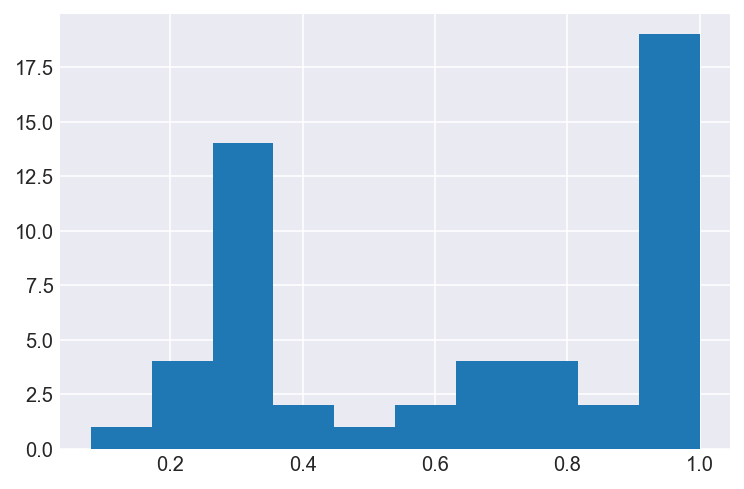

In [1087]:
plt.hist(df_merge_yuck['Participation_ACT'])

In [1088]:
stats.normaltest(df_merge_yuck['Participation_ACT'])

NormaltestResult(statistic=104.03452617569519, pvalue=2.5656043143644258e-23)

(array([21.,  2.,  2.,  3.,  3.,  3.,  9.,  2.,  1.,  7.]),
 array([0.02 , 0.118, 0.216, 0.314, 0.412, 0.51 , 0.608, 0.706, 0.804,
        0.902, 1.   ]),
 <a list of 10 Patch objects>)

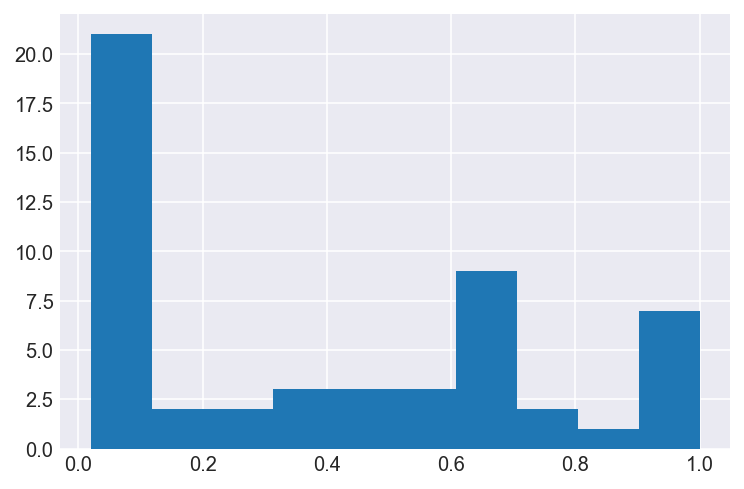

In [1089]:
plt.hist(df_merge_yuck['Participation_SAT'])

In [1090]:
stats.normaltest(df_merge_yuck['Participation_SAT'])

NormaltestResult(statistic=20.251800087187448, pvalue=4.002925310185179e-05)

##### 17. Plot the Math(s) distributions from both data sets.

NormaltestResult(statistic=67.02607371886849, pvalue=2.789157378872063e-15)

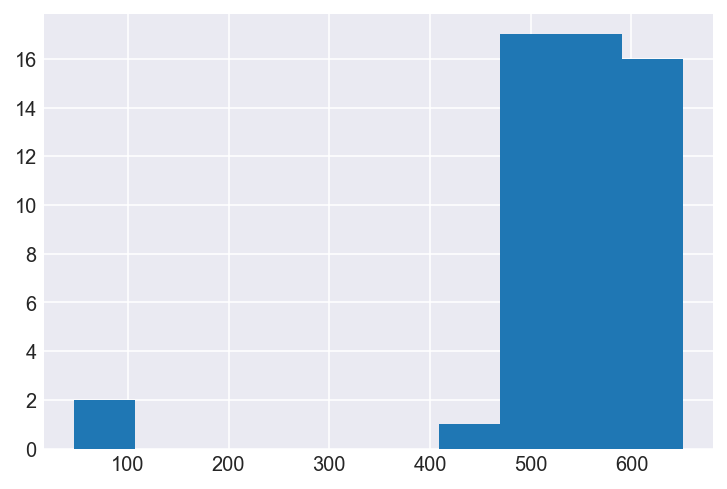

In [1091]:
plt.hist(df_merge_yuck['Math_SAT'])
stats.normaltest(df_merge_yuck['Math_SAT'])

NormaltestResult(statistic=62.68853791100938, pvalue=2.439815316330397e-14)

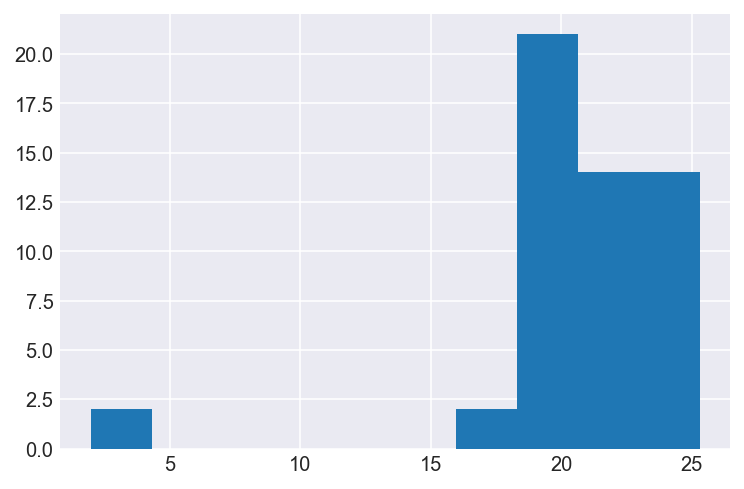

In [1092]:
plt.hist(df_merge_yuck['Math_ACT'])
stats.normaltest(df_merge_yuck['Math_ACT'])

##### 18. Plot the Verbal distributions from both data sets.

NormaltestResult(statistic=52.70987587778052, pvalue=3.5825798774500732e-12)

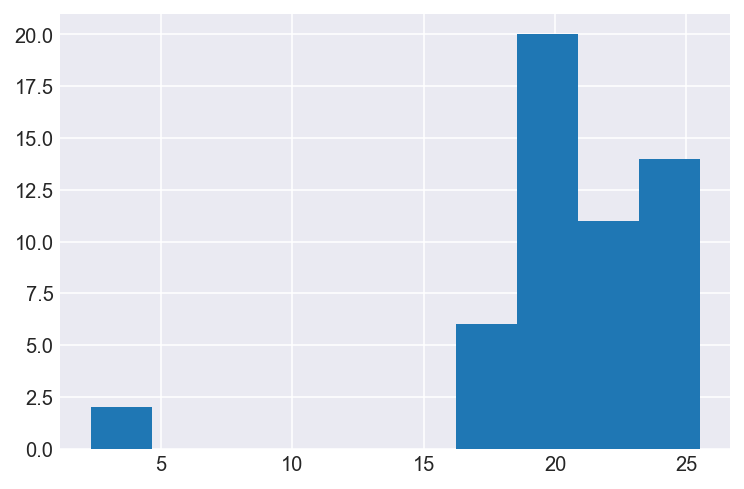

In [1093]:
plt.hist(df_merge_yuck['English_ACT'])
stats.normaltest(df_merge_yuck['English_ACT'])

NormaltestResult(statistic=69.11121470613081, pvalue=9.833098911050654e-16)

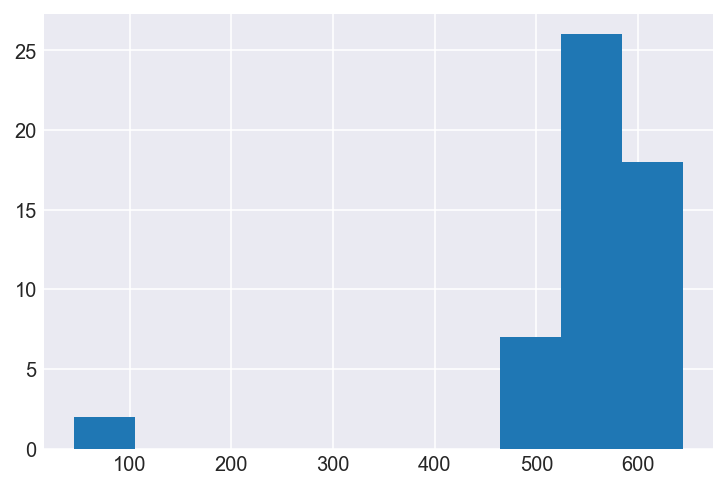

In [1094]:
plt.hist(df_merge_yuck['Reading_Writing_SAT'])
stats.normaltest(df_merge_yuck['Reading_Writing_SAT'])

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

In [1095]:
#We are assuming the data is random and that when we randomly sampled our data it is distributed normally. 

##### 20. Does this assumption hold true for any of our columns? Which?

In [1096]:
#These columns do not look normally distributed. When we test this through the p value, only one has a pvalue that is low enough but it appears to be a reverse bell curve which means it is not normally distributed.  

##### 21. Plot some scatterplots examining relationships between all variables.

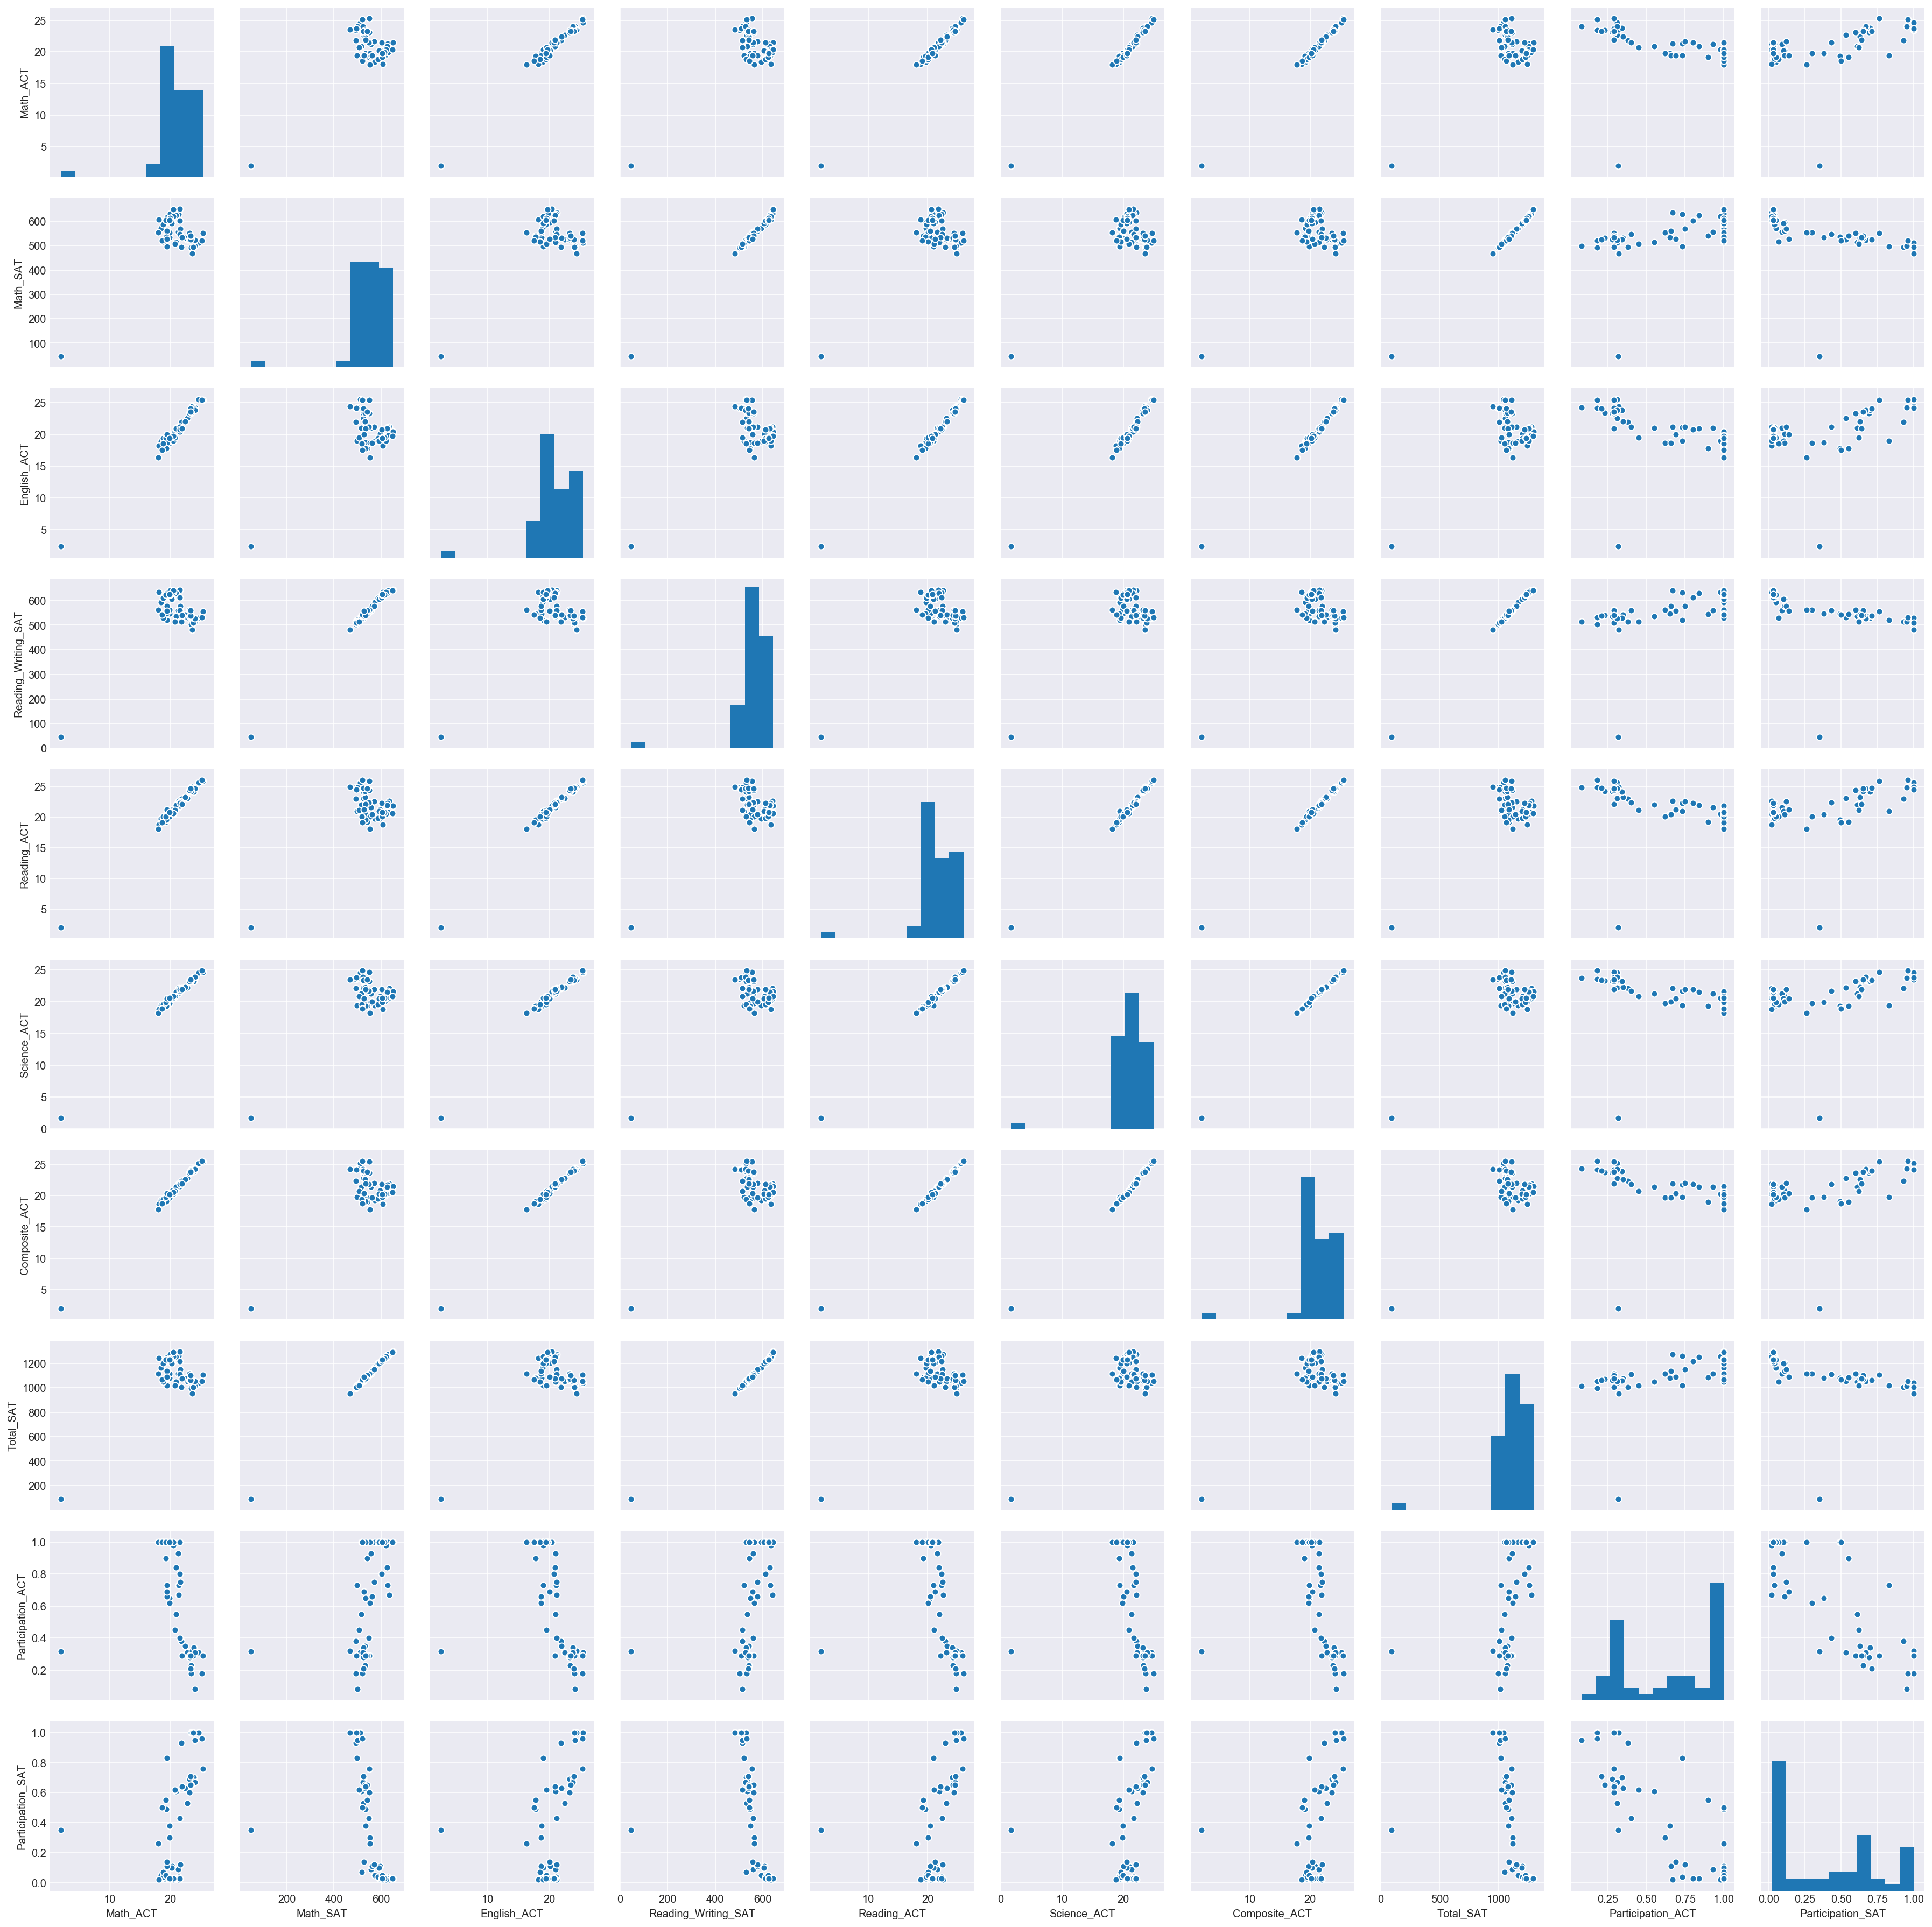

In [1097]:
sns.pairplot(df_merge[['Math_ACT', 'Math_SAT', 'English_ACT', 'Reading_Writing_SAT', 'Reading_ACT', 'Science_ACT', 'Composite_ACT', 'Total_SAT', 'Participation_ACT', 'Participation_SAT']], kind='scatter')

##### 22. Are there any interesting relationships to note?

In [1098]:
#definitely the most obvious and central to anylizing the results is how the total sat and cumulative act are correlated positively with the scores that make up their test english and math. 

#Other major observations of note are how the there is low correlation between SAT and ACT performance. If anything the lose relationship is negative which is suprising because people who do well on the ACt should do well on the SAT.
#Ultimately this can be explained by the participation rates. States that had low participatoin in SAT performed better on the SAT than states whith high participation. The same relationship applied to the ACT as well. On that note a state with higher participation on the ACT performed better on the SAT and a state with a higher participation on SAT performed better on the SAT. 



##### 23. Create box plots for each variable. 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


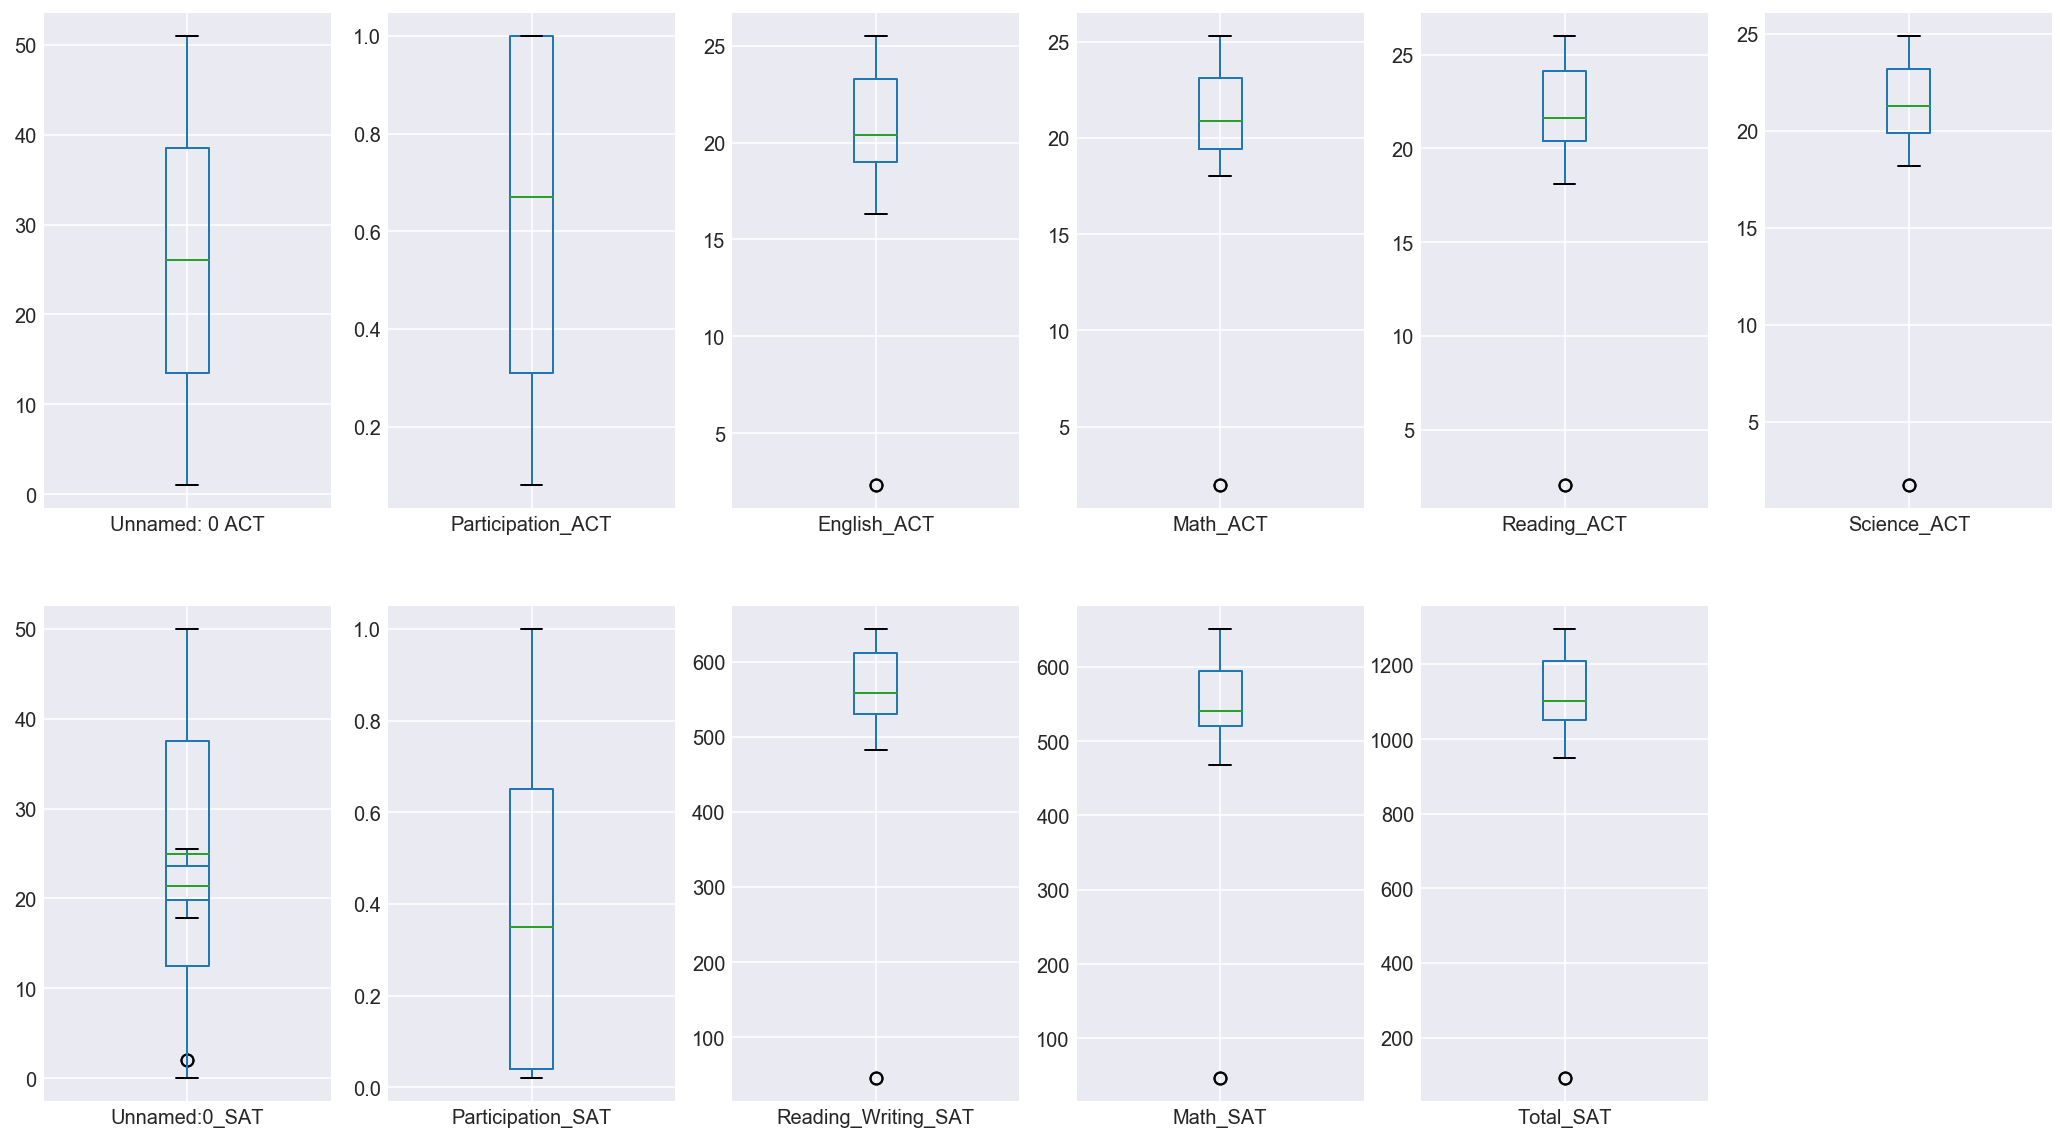

In [1099]:
fig = plt.figure(figsize=(18, 10))
act_counter = 1
sat_counter = 7
for c in df_merge_yuck.select_dtypes("number"):
    if "ACT" in c:
        fig.add_subplot(2, 6, act_counter)
        df_merge_yuck.boxplot(column = c)
        act_counter += 1
    else:
        fig.add_subplot(2, 6, sat_counter)
        df_merge_yuck.boxplot(column = c)
        sat_counter += 1

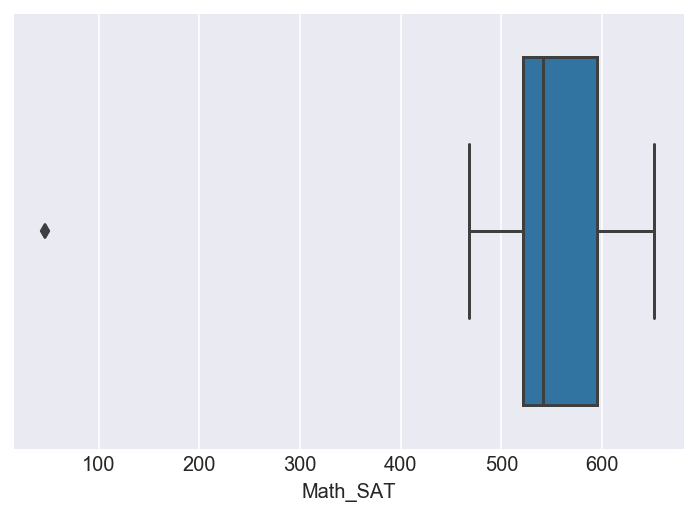

In [1100]:
sns.boxplot(df_merge_yuck['Math_SAT'])

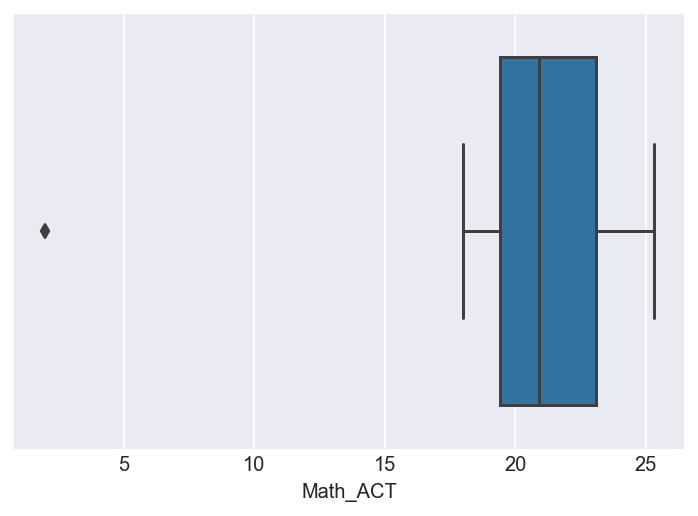

In [1101]:
sns.boxplot(df_merge_yuck['Math_ACT'])

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

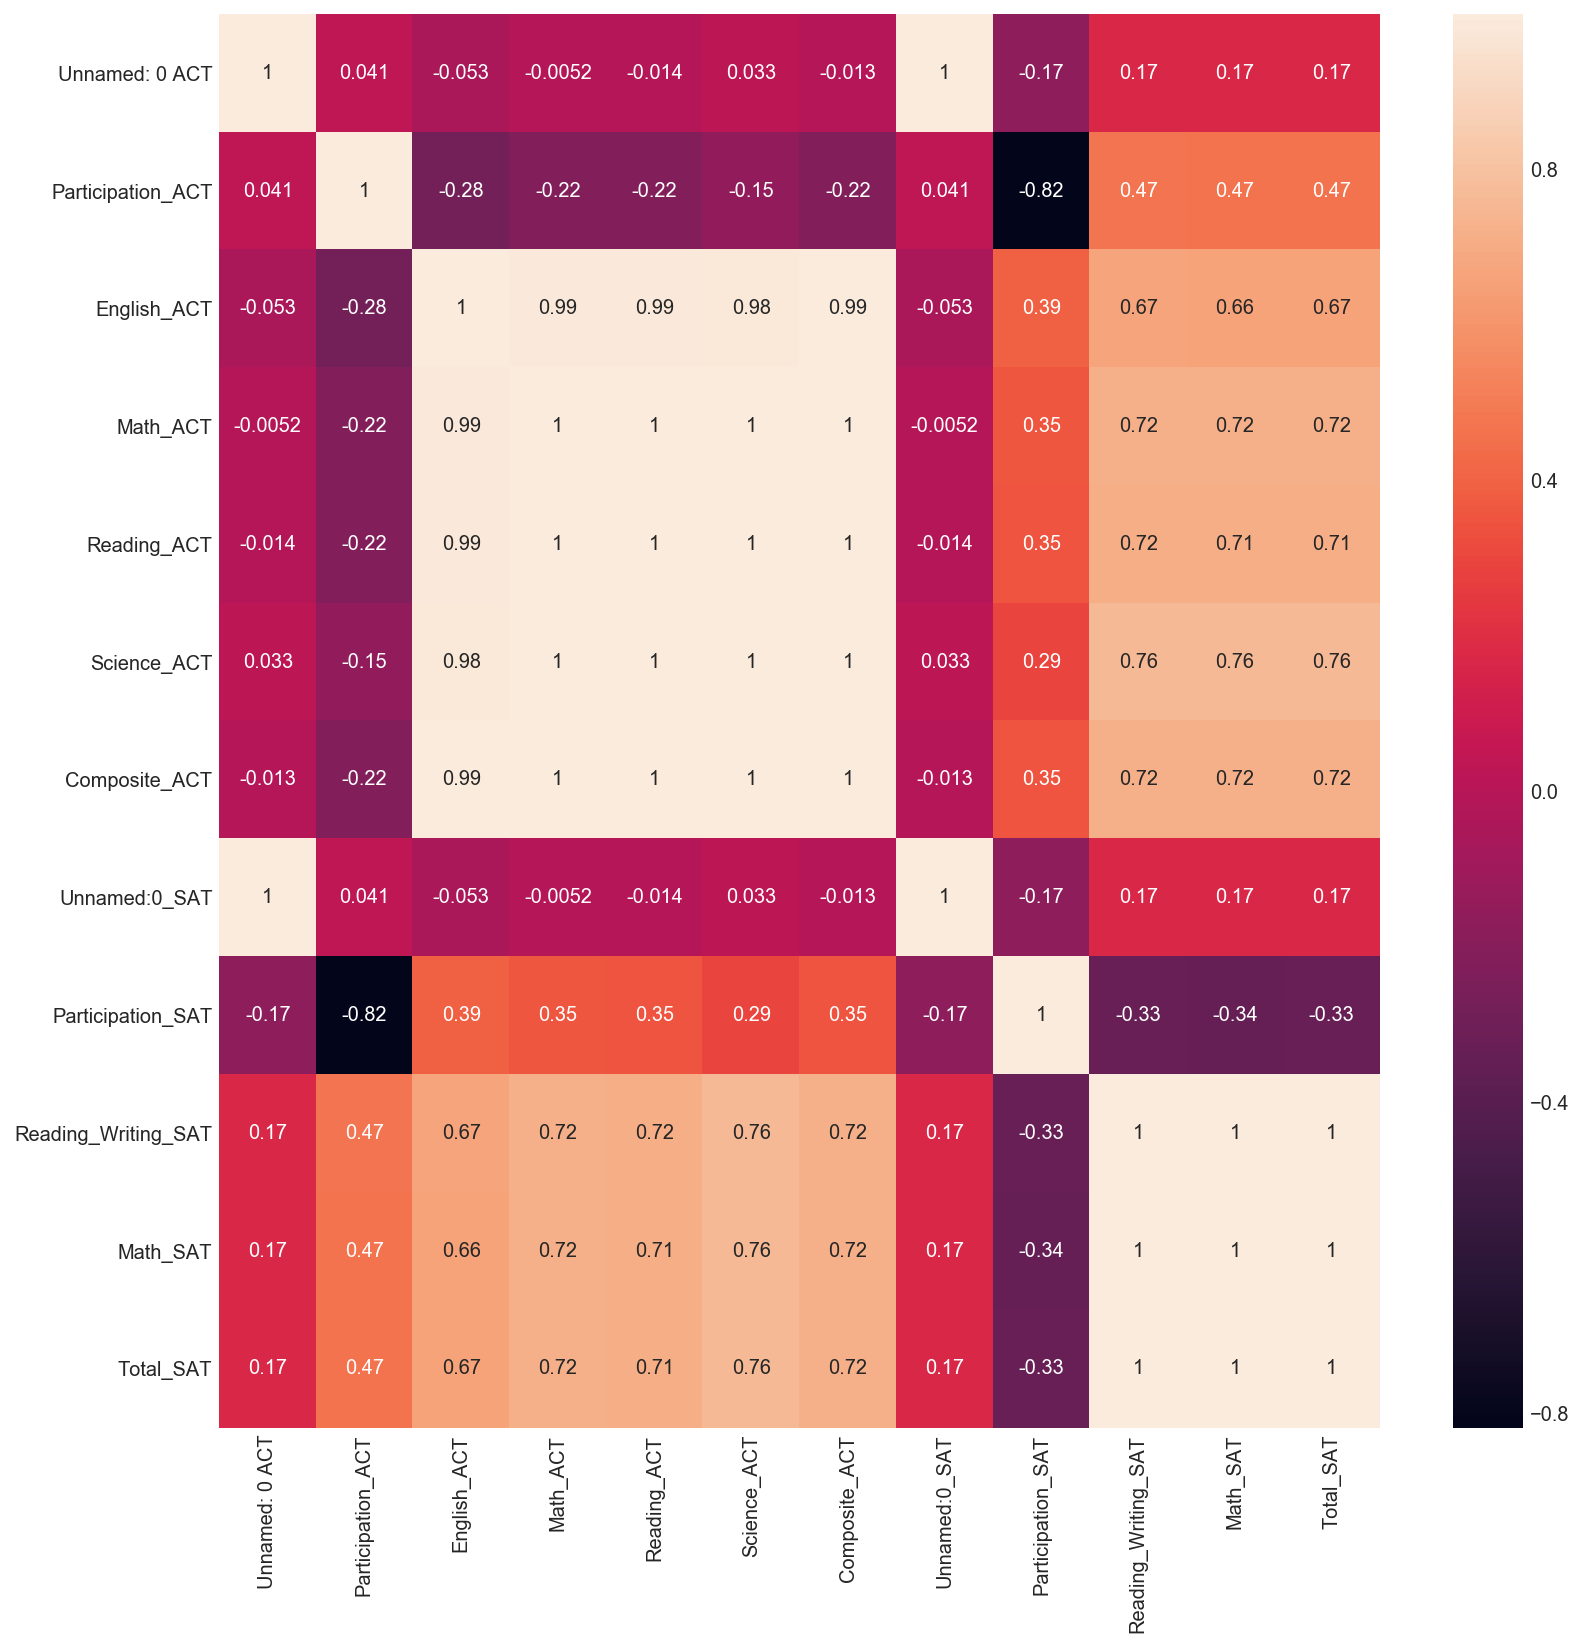

In [1102]:
plt.figure(figsize=(13,13))
sns.heatmap(df_merge_yuck.corr(), annot=True)

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In [1106]:
df_merge_yuck.describe()

,Unnamed: 0 ACT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Unnamed:0_SAT,Participation_SAT,Reading_Writing_SAT,Math_SAT,Total_SAT
count,51.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,51.000000,53.000000,53.000000,53.000000,53.000000
mean,26.000000,0.639934,20.229452,20.457074,21.260260,20.706499,20.783049,25.000000,0.396200,549.347810,537.628571,1087.059755
std,14.866069,0.321662,4.258166,4.177188,4.343297,4.161038,4.245757,14.866069,0.346043,110.288282,108.489038,218.712746
min,1.000000,0.080000,2.330488,1.962462,2.046903,1.722216,2.000786,0.000000,0.020000,45.216970,46.657134,91.583511
25%,13.500000,0.310000,19.000000,19.400000,20.400000,19.900000,19.800000,12.500000,0.040000,531.000000,521.000000,1052.000000
50%,26.000000,0.670000,20.400000,20.900000,21.600000,21.300000,21.400000,25.000000,0.349291,558.000000,541.000000,1102.000000
75%,38.500000,1.000000,23.300000,23.100000,24.100000,23.200000,23.600000,37.500000,0.650000,612.000000,595.000000,1208.000000
max,51.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,50.000000,1.000000,644.000000,651.000000,1295.000000


In [1117]:
#Math_ACT is not normally distributed. The mean is 20.5 and the STD is 4.177. 
#English_ACT is not normally distributed. The mean is 20.3 and the std is 4.248.
#Reading_ACT is not normally distributed. The mean is 21.2 and the std is 4.34.
#Science_ACT is normally distributed. The mean is 20.7 and the std is 4.16. I discounted the outlier in this case which made it clearly normal distribution because the outliar is the standard deviation that I added. Pvalue also is inline with the suggestion. 
#Composite_ACT is not normally distributed. The mean is 20.7 and the std is 4.24. 
#Participation_ACT is not normally distributed. Looks like a bell curve. The mean is .64 and the std is .32 which is massively large. 
#Participation_SAT is not normally distributed. I removed the outlire which is from the std that we added and it appears to be normal. The mean is .39 and the std is .34. 
#Math_SAT is not normally distributed. The average is 538 and the std is 108.5. 
#Reading_Writing_SAT is normally distributed. The average is 549.3 and std is 110.3. Pvalue aligns with this. 
#Total_SAT is normally distributed. The average was 1087.1 and the std is 2018.7. Pvalue aligns with this. 
#The standard deviations of English and Math STD almost add exactly up to the std of total. This makes sense as they cumuliatively add up to that score and depend on the same information. And the same applies for the total average relative to the average math score and average english score. 

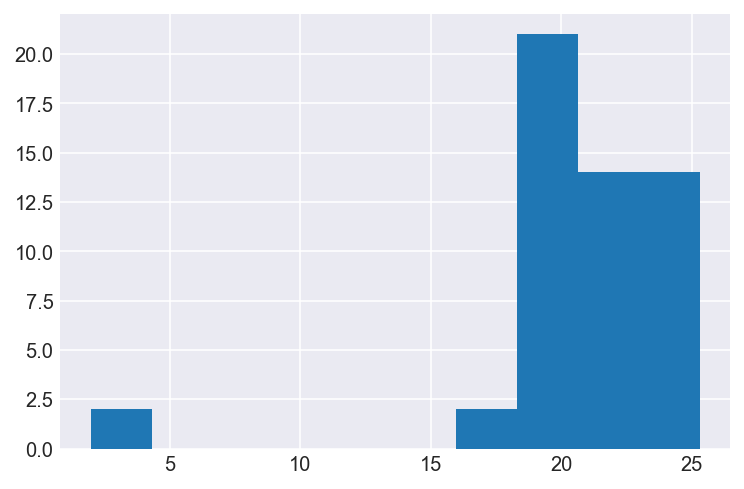

In [1105]:
plt.hist(df_merge_yuck['Math_ACT']);


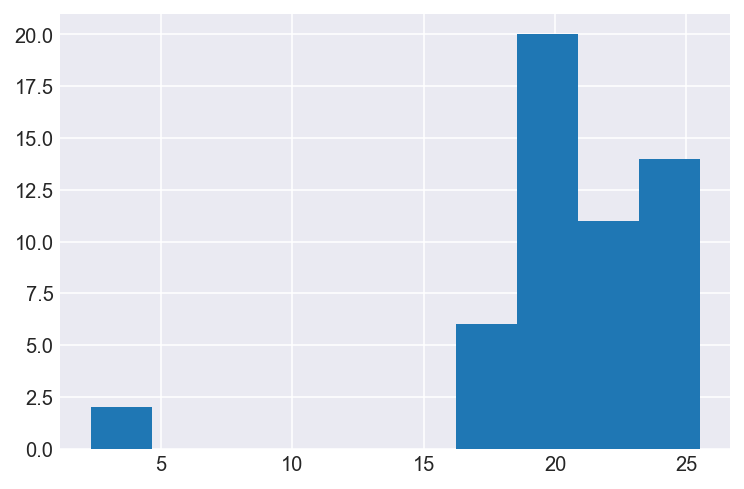

In [1108]:
plt.hist(df_merge_yuck['English_ACT']);


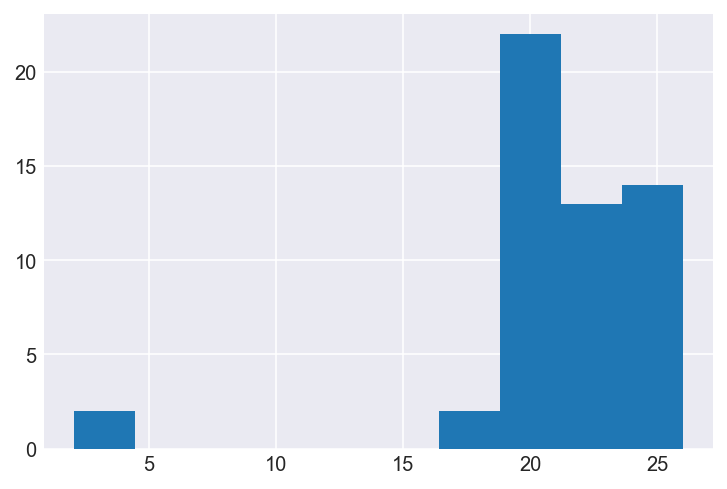

In [1109]:
plt.hist(df_merge_yuck['Reading_ACT']);

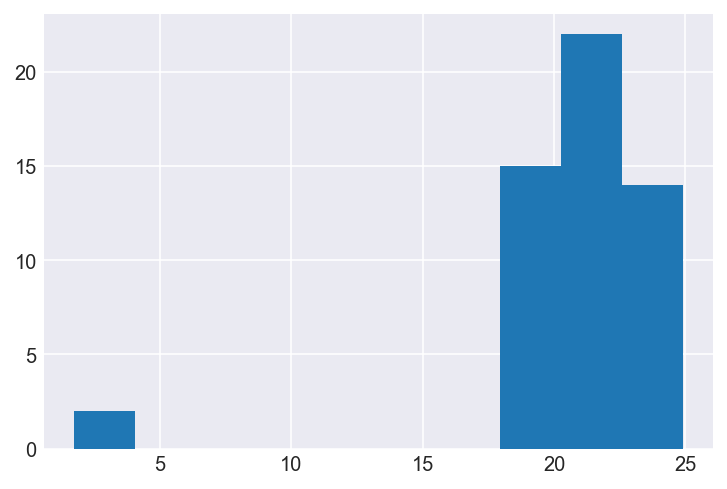

In [1110]:
plt.hist(df_merge_yuck['Science_ACT']);

In [1125]:
stats.normaltest(df_merge_yuck['Science_ACT'])

NormaltestResult(statistic=68.7742742391944, pvalue=1.1637403708282692e-15)

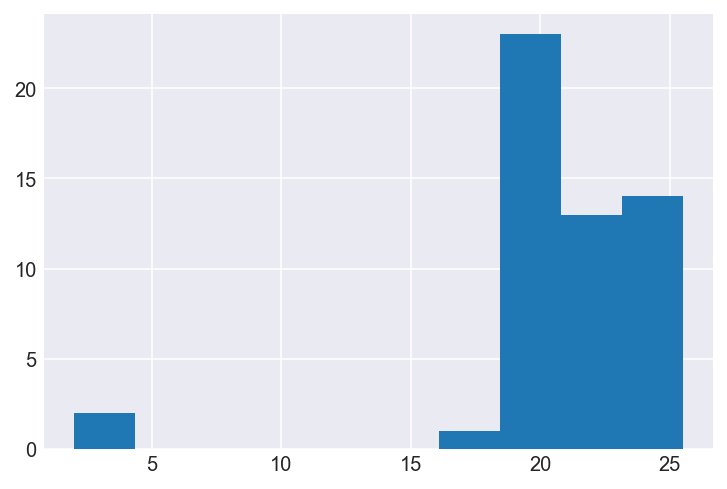

In [1111]:
plt.hist(df_merge_yuck['Composite_ACT']);

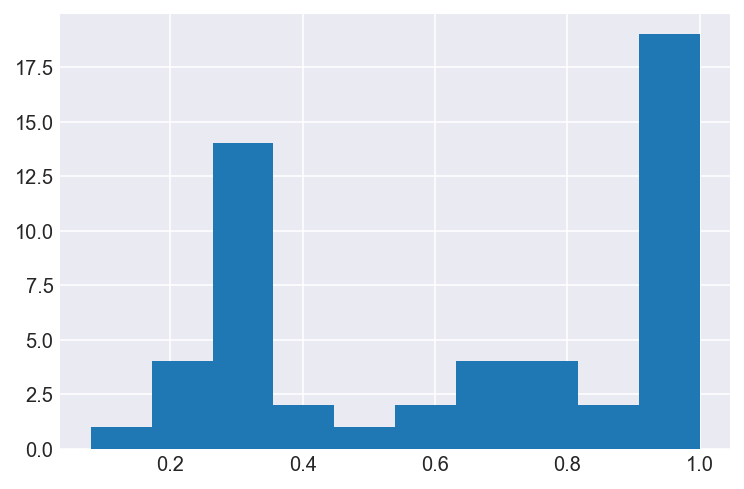

In [1112]:
plt.hist(df_merge_yuck['Participation_ACT']);

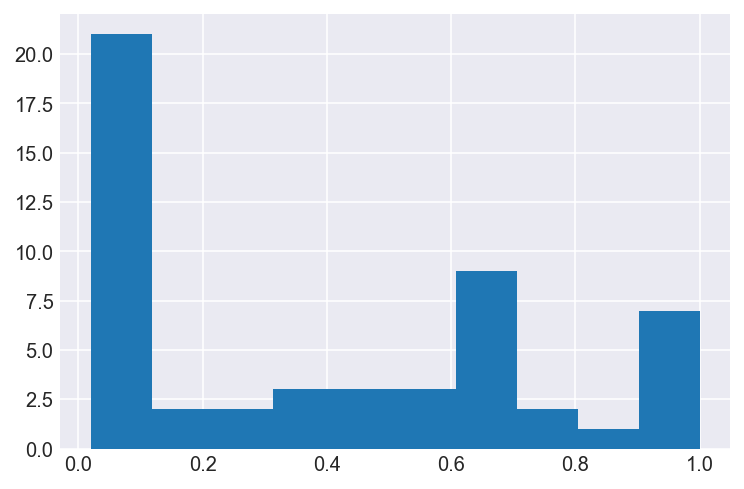

In [1113]:
plt.hist(df_merge_yuck['Participation_SAT']);

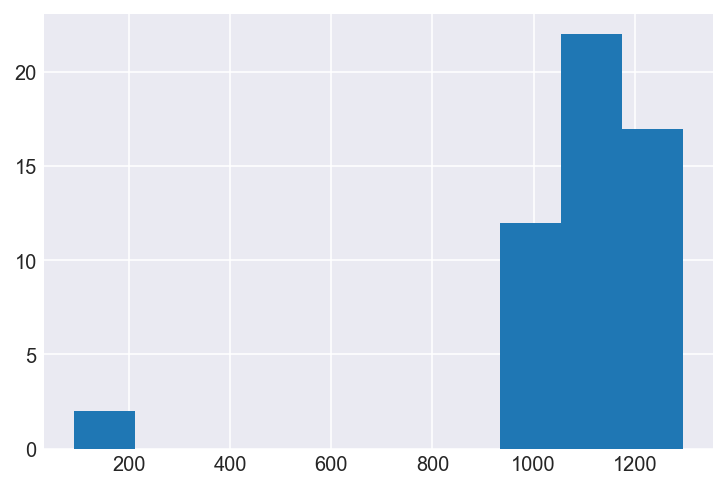

In [1114]:
plt.hist(df_merge_yuck['Total_SAT']);

In [1127]:
stats.normaltest(df_merge_yuck['Total_SAT'])

NormaltestResult(statistic=68.22035316909184, pvalue=1.5351065777145734e-15)

NormaltestResult(statistic=69.11121470613081, pvalue=9.833098911050654e-16)

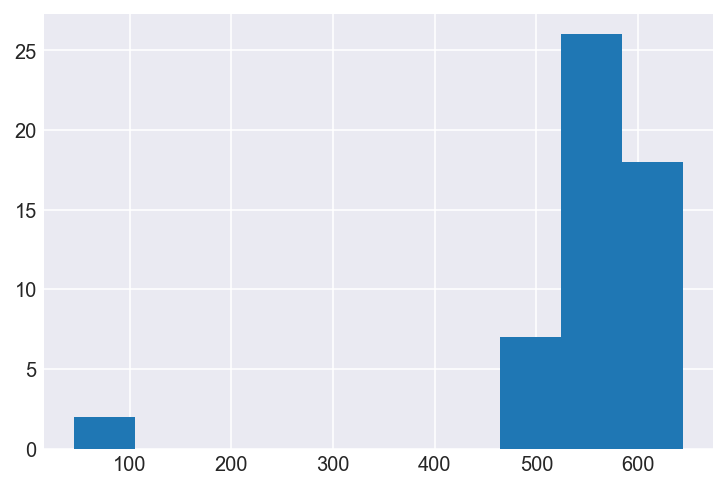

In [1126]:
plt.hist(df_merge_yuck['Reading_Writing_SAT']);
stats.normaltest(df_merge_yuck['Reading_Writing_SAT'])

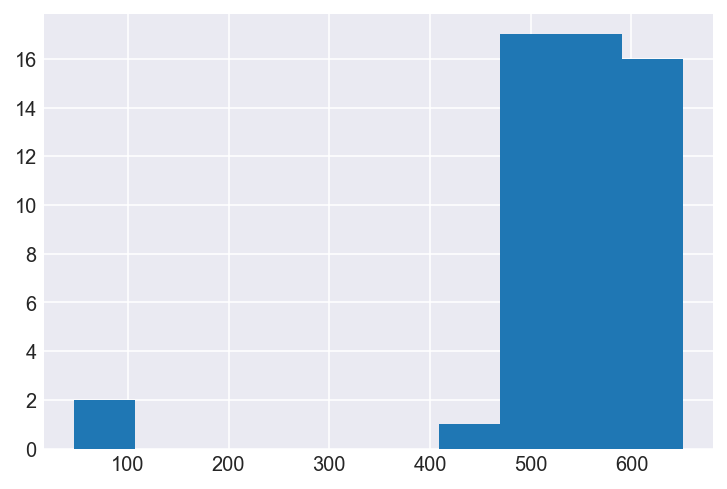

In [1116]:
plt.hist(df_merge_yuck['Math_SAT']);

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

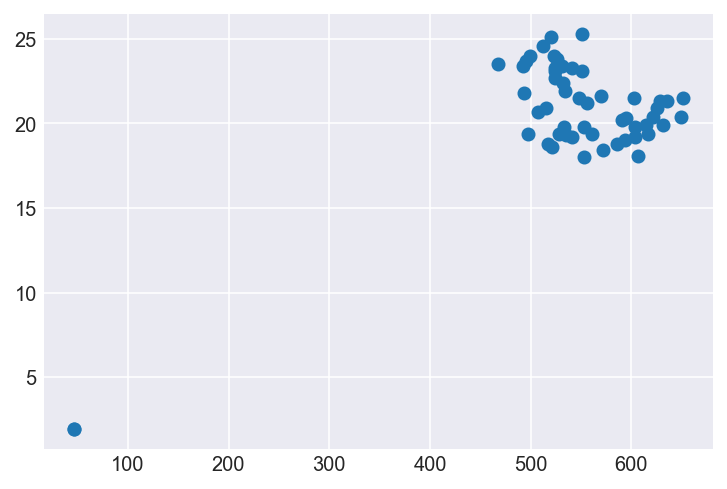

In [1282]:
plt.scatter(df_merge_yuck['Math_SAT'], df_merge_yuck['Math_ACT'])

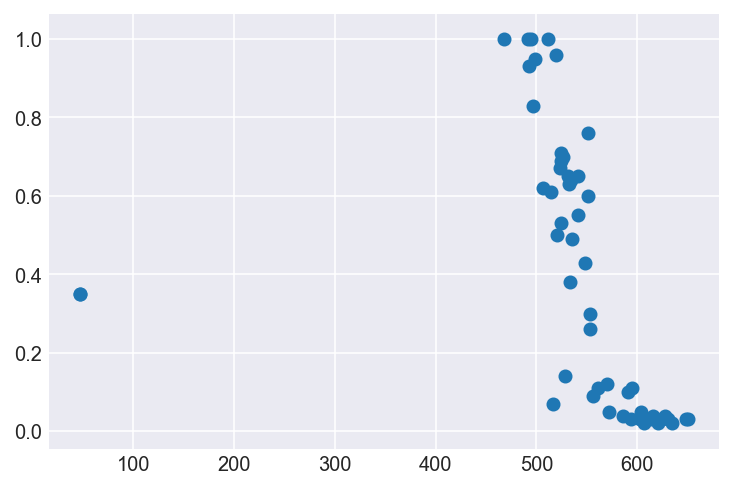

In [1283]:
plt.scatter(df_merge_yuck['Math_SAT'], df_merge_yuck['Participation_SAT'])

TypeError: scatter() missing 1 required positional argument: 'y'

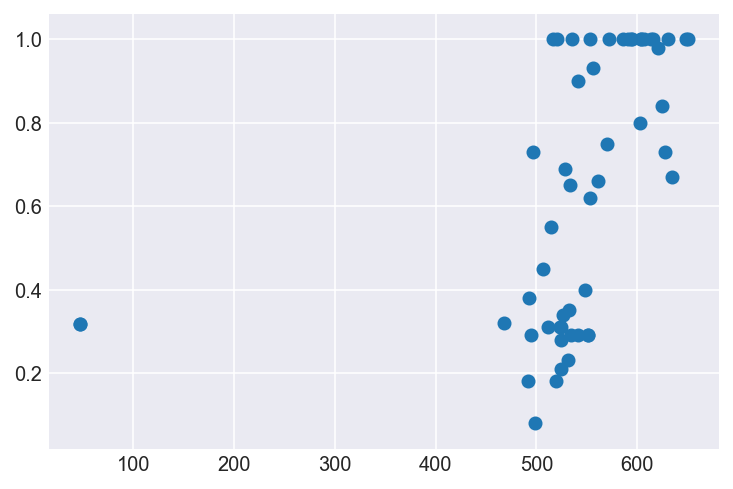

In [1284]:
plt.scatter(plt.scatter(df_merge_yuck['Math_SAT'], df_merge_yuck['Participation_ACT']))

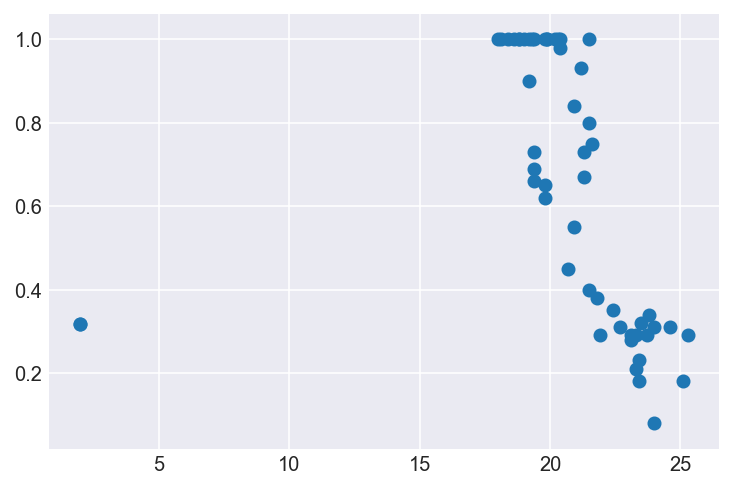

In [1285]:
plt.scatter(df_merge_yuck['Math_ACT'], df_merge_yuck['Participation_ACT'])

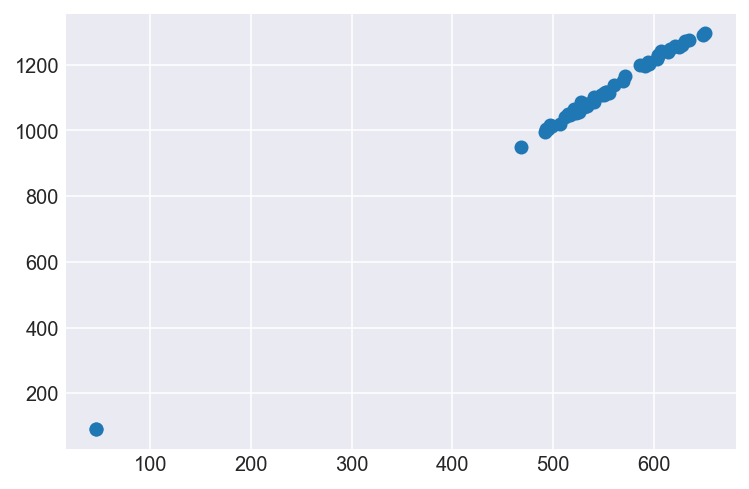

In [1290]:
plt.scatter(df_merge_yuck['Math_SAT'], df_merge_yuck['Total_SAT'])

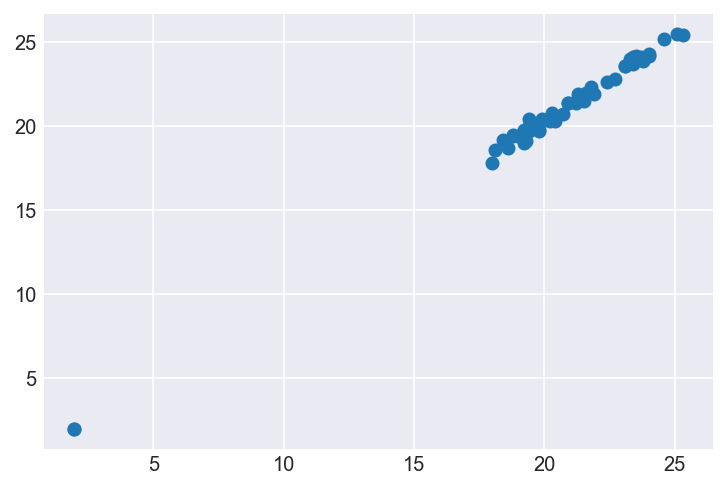

In [1291]:
plt.scatter(df_merge_yuck['Math_ACT'], df_merge_yuck['Composite_ACT'])

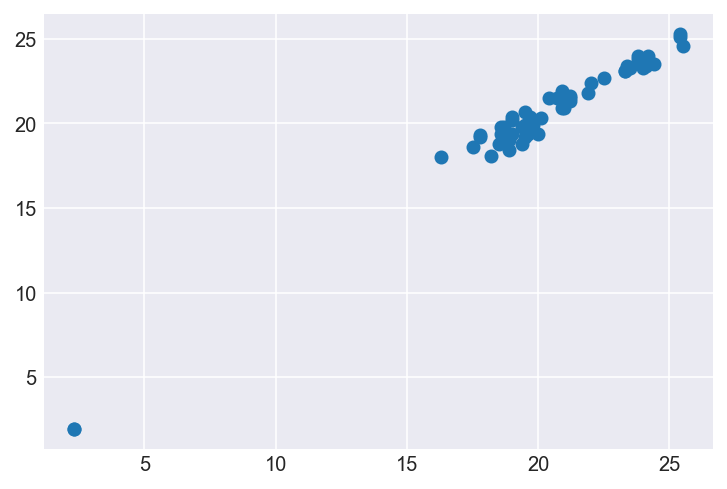

In [1293]:
plt.scatter(df_merge_yuck['English_ACT'], df_merge_yuck['Math_ACT'])

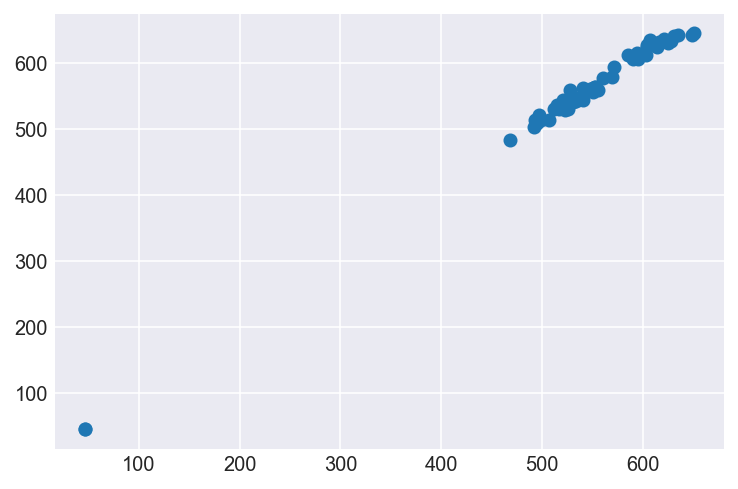

In [1294]:
plt.scatter(df_merge_yuck['Math_SAT'], df_merge_yuck['Reading_Writing_SAT'])

In [1295]:
#Looking at all this information there are a lot of important pieces of information. From a sainity check the total for both ACT and SAT are linked linearly with the English and Math scores. A bit more suprising is how linearly SAT and ACT scores align when it comes to English and Math. There is a direct correlation of 1 or .99 which is a lot. The most intereting part of this data is the the fact that participation is invertedly related to the performance of people on the test. So the less people in a state take the SAT the better the state did. This applies to the ACt as well. The reason for this is likely self selection based on income and based on academic interest/ performance. People who take both tests can afford both tests and have the motivation to take both. This certainly is not a rule and could be disproven but this feels like the most likely explianation. 

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [1249]:
import scipy.stats as stats

In [1252]:
t_stat, p_value = stats.ttest_ind(df_merge_yuck['Participation_SAT'], df_merge_yuck['Participation_ACT'])

In [1253]:
p_value

0.0002852615734480346

In [1254]:
t_stat

-3.755736366201619

In [1255]:
p_value = lower_tail

In [1256]:
p_value

0.0001426307867240173

In [1257]:
Part_SAT_Mean = np.mean(df_merge_yuck['Participation_SAT'])

In [1258]:
Part_SAT_Mean

0.39619964934590385

In [1259]:
sdr_error=(np.std(df_merge_yuck['Participation_SAT'])/ np.sqrt(53))*1.96

In [1260]:
sdr_error

0.09228091076109848

In [1261]:
Upper = Part_SAT_Mean + sdr_error
Upper

0.48848056010700236

In [1262]:
Lower = Part_SAT_Mean - sdr_error
Lower

0.30391873858480534

In [1263]:
#Judging by the p_value I reject the nullhypothesis with 95% certainty that the Participation Rate for the ACT and SAT are different.  

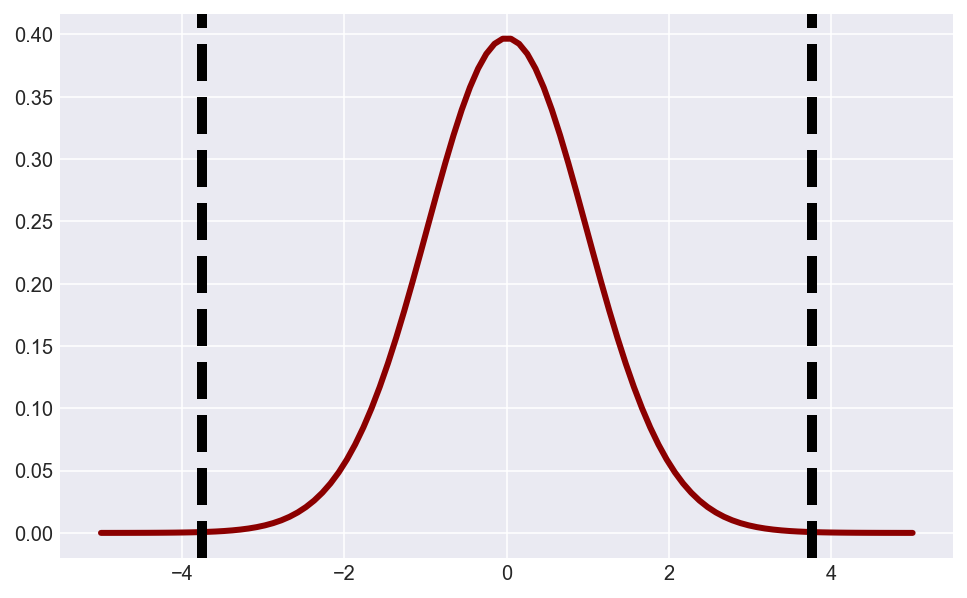

In [1265]:
xpoints = np.linspace(-5,5,100)
ypoints = stats.t.pdf(xpoints, len(df_merge_yuck['Participation_ACT']))

fig = plt.figure(figsize=(8,5))
ax = fig.gca()
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')
ax.axvline(t_stat, color='black', linestyle='--', lw=5)
ax.axvline(-t_stat, color='black', linestyle='--', lw=5)

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [1279]:
Lower

0.30391873858480534

In [1280]:
Upper

0.48848056010700236

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

In [1281]:
#Not really suprising. The means of SAT and ACT are very likely separte and the confidence intervals only confirm that. 

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

In [1277]:
#It is not appropriate to on its own. The reason is that the SAT and ACT scores are dicated by how many people in their population take the test more than the other factors. Being a binary choice, when a majority of people take 1 test, a minority of people take the other test. There are plenty of reasons as to why I think this might be the case but to properly compare the correlation of SAT and ACT Math scores, a person needs to control for % of the population taking the test. 

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

In [1278]:
#I would say no. The relationship is pretty messed up and not intuitive entirely. For things like saying which state is smarter this is really terrible. It might have some good properties and be able to predict a few things here or there, but considering many distribution are not normal and some of the standard deviations are extremely wide I would not find it overly explainitory and capable of making stistical inferences/ predictions. 